In [293]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Dataset Description

The dataset contains number of coivd cases, recovered & deaths from different countries over a period of 126 days

In [294]:
df = pd.read_csv("covid.csv",parse_dates=["Date"])
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [295]:
df.dtypes

Date         datetime64[ns]
Country              object
Confirmed             int64
Recovered             int64
Deaths                int64
dtype: object

In [296]:
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['day'] = pd.DatetimeIndex(df['Date']).day
df['day_name'] = pd.DatetimeIndex(df['Date']).day_name()
df.head()

,Date,Country,Confirmed,Recovered,Deaths,year,month,day,day_name
0,2020-01-22,Afghanistan,0,0,0,2020,1,22,Wednesday
1,2020-01-22,Albania,0,0,0,2020,1,22,Wednesday
2,2020-01-22,Algeria,0,0,0,2020,1,22,Wednesday
3,2020-01-22,Andorra,0,0,0,2020,1,22,Wednesday
4,2020-01-22,Angola,0,0,0,2020,1,22,Wednesday


In [297]:
df['day_name'].nunique()

7

In [298]:
df.shape

(23688, 9)

Let's look at the number of days in the survey data

In [299]:
df['Date'].nunique()

126

Let's look at the number of countries in the survey data

In [300]:
df['Country'].nunique()

188

In [301]:
df['year'].nunique()

1

In [302]:
df.drop('year',axis=1,inplace=True)

In [303]:
df.head()

,Date,Country,Confirmed,Recovered,Deaths,month,day,day_name
0,2020-01-22,Afghanistan,0,0,0,1,22,Wednesday
1,2020-01-22,Albania,0,0,0,1,22,Wednesday
2,2020-01-22,Algeria,0,0,0,1,22,Wednesday
3,2020-01-22,Andorra,0,0,0,1,22,Wednesday
4,2020-01-22,Angola,0,0,0,1,22,Wednesday


In [304]:
df['month'].nunique()

5

In [305]:
df.describe()

,Confirmed,Recovered,Deaths,month,day
count,2.368800e+04,23688.000000,23688.000000,23688.000000,23688.000000
mean,7.969368e+03,2581.801714,526.935030,3.261905,15.968254
std,5.842109e+04,15143.101257,3992.815956,1.242007,8.730660
min,0.000000e+00,0.000000,0.000000,1.000000,1.000000
25%,0.000000e+00,0.000000,0.000000,2.000000,8.000000
50%,1.800000e+01,1.000000,0.000000,3.000000,16.000000
75%,7.300000e+02,123.000000,13.000000,4.000000,24.000000
max,1.680913e+06,384902.000000,98913.000000,5.000000,31.000000


In [306]:
df.head()

,Date,Country,Confirmed,Recovered,Deaths,month,day,day_name
0,2020-01-22,Afghanistan,0,0,0,1,22,Wednesday
1,2020-01-22,Albania,0,0,0,1,22,Wednesday
2,2020-01-22,Algeria,0,0,0,1,22,Wednesday
3,2020-01-22,Andorra,0,0,0,1,22,Wednesday
4,2020-01-22,Angola,0,0,0,1,22,Wednesday


In [307]:
Date = df.groupby(['Date'],sort = True).sum()
Date

,Confirmed,Recovered,Deaths,month,day
Date,,,,,
2020-01-22,555,28,17,188,4136
2020-01-23,654,30,18,188,4324
2020-01-24,941,36,26,188,4512
2020-01-25,1434,39,42,188,4700
2020-01-26,2118,52,56,188,4888
...,...,...,...,...,...
2020-05-22,5210817,2056643,338160,940,4136
2020-05-23,5310362,2112185,342097,940,4324
2020-05-24,5407613,2168563,345059,940,4512


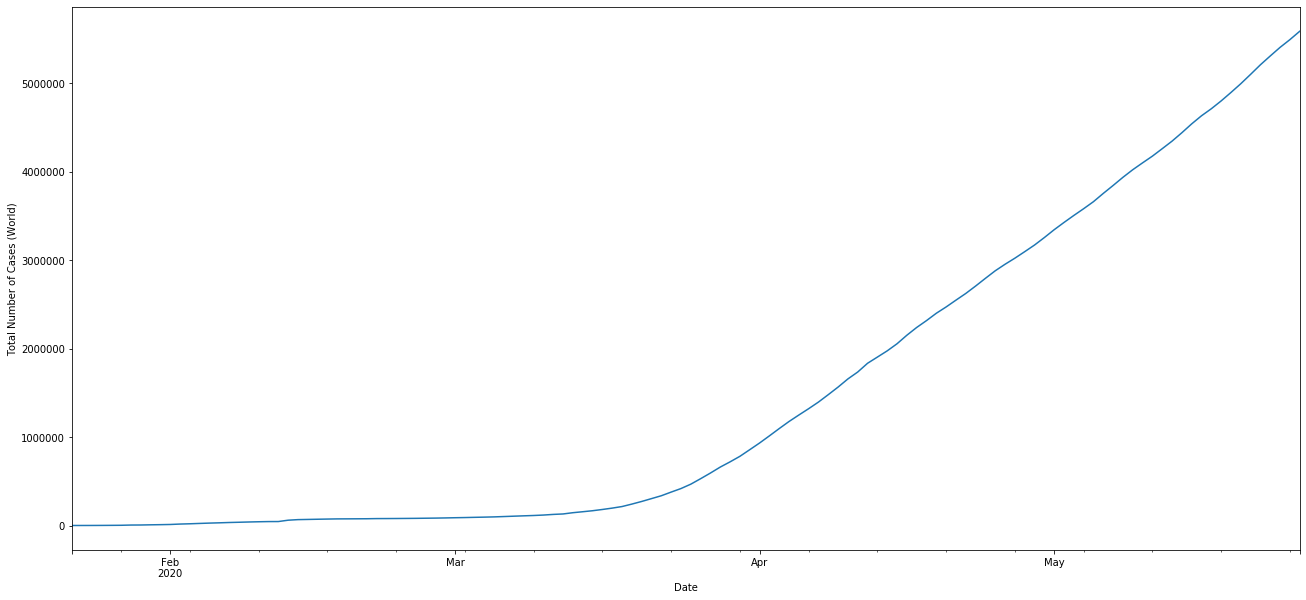

In [310]:
plt.figure(figsize= (22,10))
plt.ylabel('Total Number of Cases (World)')
Date["Confirmed"].plot()

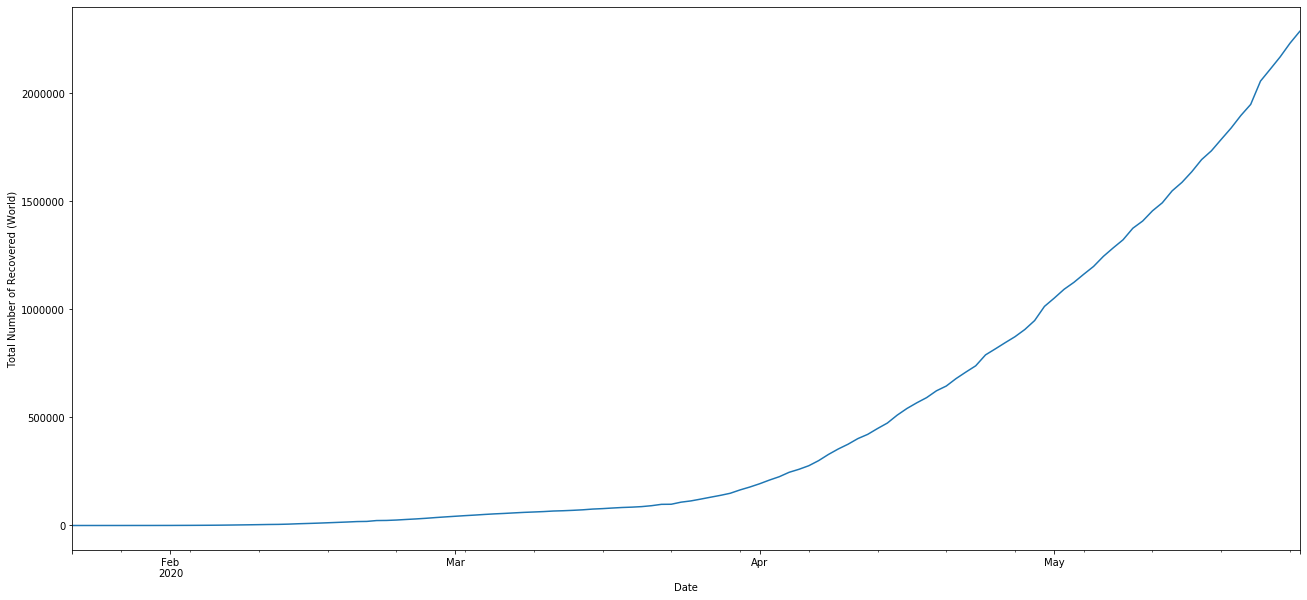

In [311]:
plt.figure(figsize= (22,10))
plt.ylabel('Total Number of Recovered (World)')
Date["Recovered"].plot()

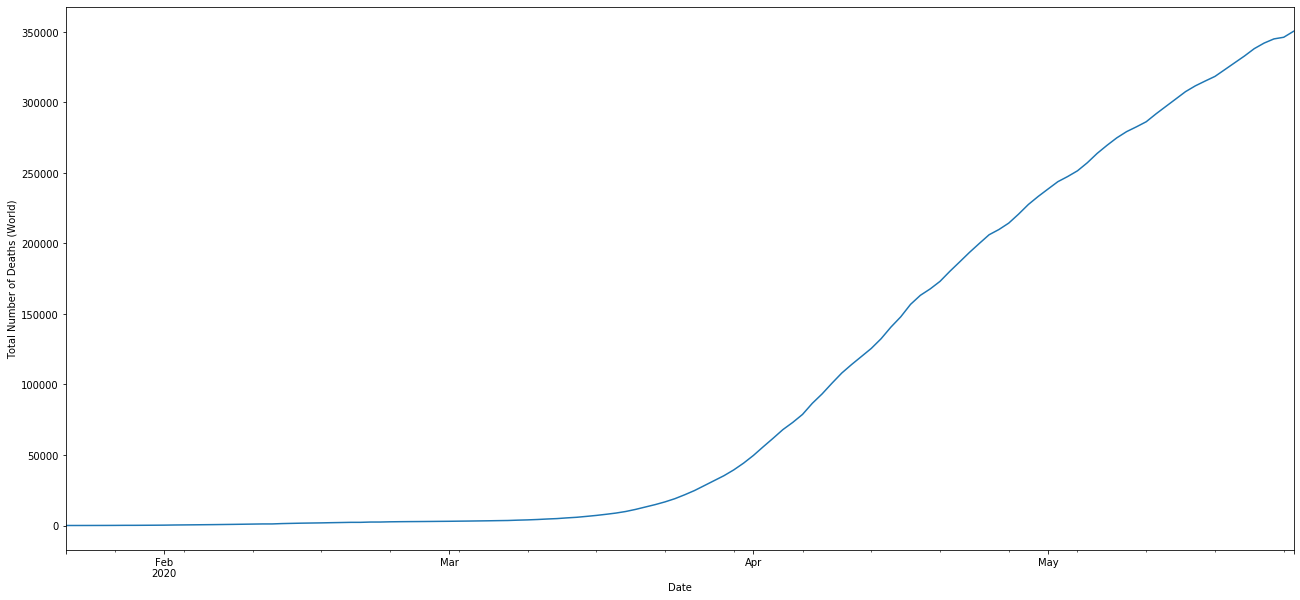

In [312]:
plt.figure(figsize= (22,10))
plt.ylabel('Total Number of Deaths (World)')
Date["Deaths"].plot()

In [313]:
Country = df.groupby(['Country'],sort = True).sum()
Country

,Confirmed,Recovered,Deaths,month,day
Country,,,,,
Afghanistan,185236,20845,4669,411,2012
Albania,41253,25688,1629,411,2012
Algeria,240070,107345,23232,411,2012
Andorra,41573,20751,2219,411,2012
Angola,1892,506,131,411,2012
...,...,...,...,...,...
West Bank and Gaza,19971,8798,113,411,2012
Western Sahara,307,186,1,411,2012
Yemen,2696,92,460,411,2012


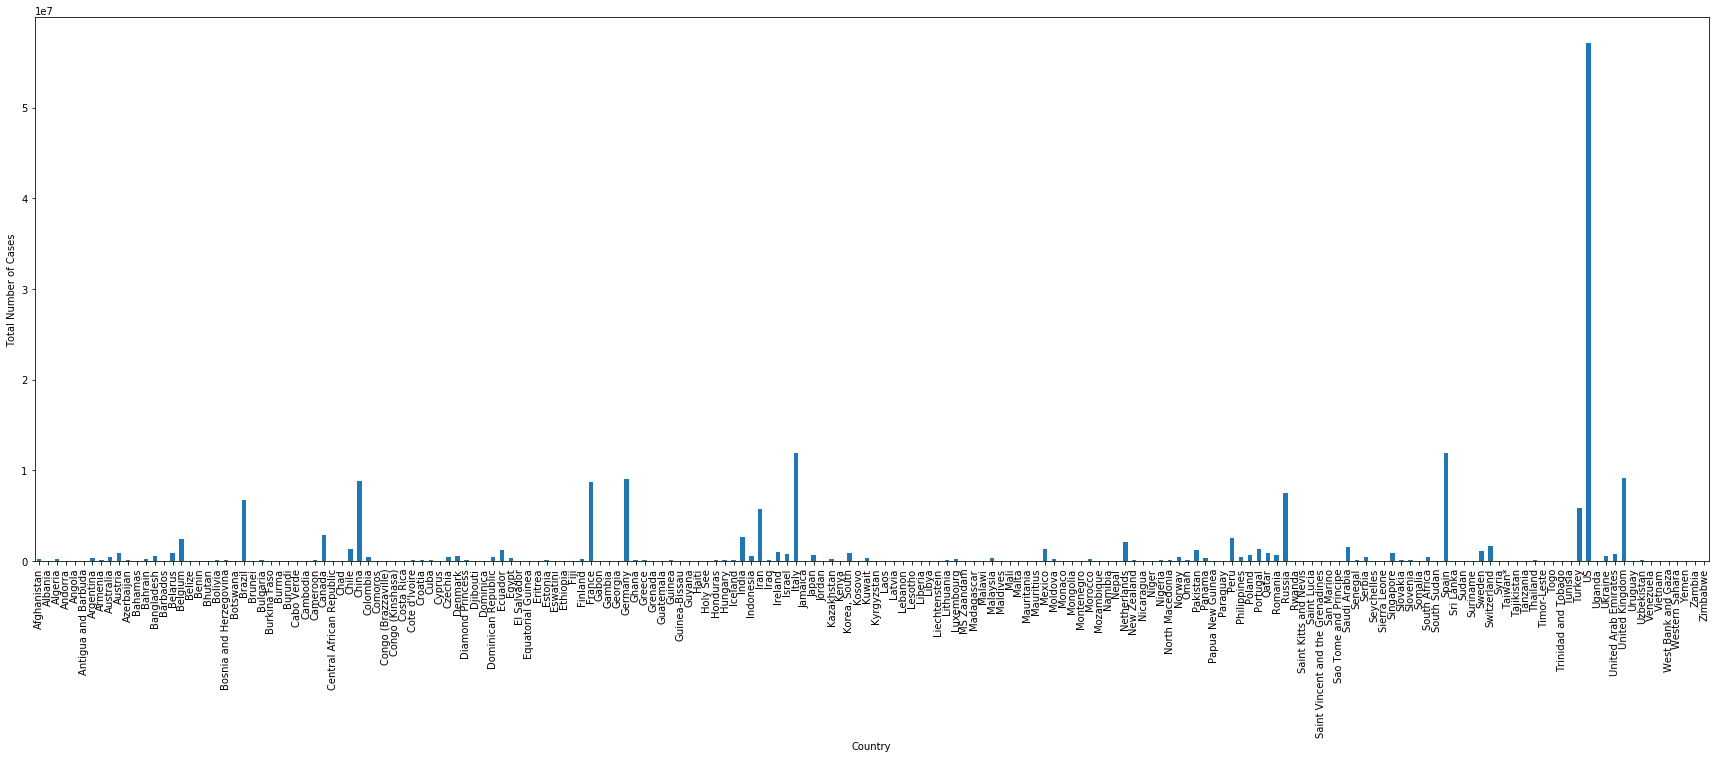

In [314]:
plt.figure(figsize= (30,10))
plt.ylabel('Total Number of Cases')
Country["Confirmed"].plot.bar()

In [315]:
df.head()

,Date,Country,Confirmed,Recovered,Deaths,month,day,day_name
0,2020-01-22,Afghanistan,0,0,0,1,22,Wednesday
1,2020-01-22,Albania,0,0,0,1,22,Wednesday
2,2020-01-22,Algeria,0,0,0,1,22,Wednesday
3,2020-01-22,Andorra,0,0,0,1,22,Wednesday
4,2020-01-22,Angola,0,0,0,1,22,Wednesday


In [316]:
month = df.groupby(['month'],sort = True).sum()
month

,Confirmed,Recovered,Deaths,day
month,,,,
1,38534,844,889,49820
2,1671783,380794,46898,81780
3,8899917,2706089,396863,93248
4,63046693,16322390,4291044,87420
5,115121451,41747602,7746343,65988


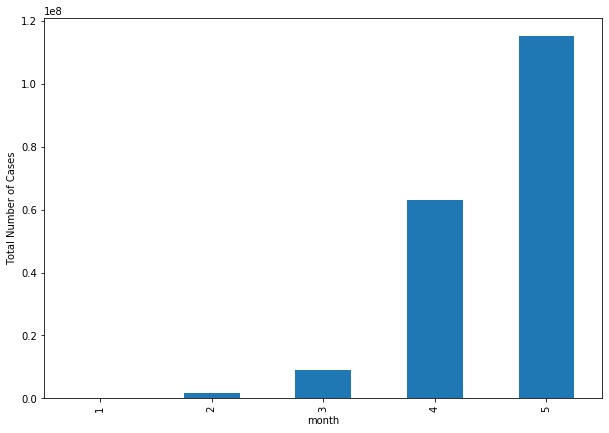

In [317]:
plt.figure(figsize= (10,7))
plt.ylabel('Total Number of Cases')
month["Confirmed"].plot.bar()

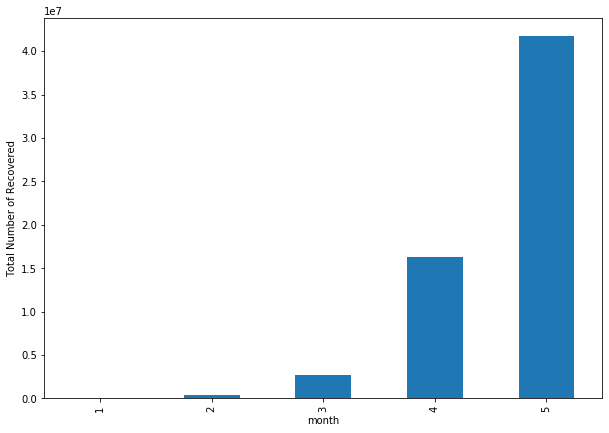

In [318]:
plt.figure(figsize= (10,7))
plt.ylabel('Total Number of Recovered')
month["Recovered"].plot.bar()

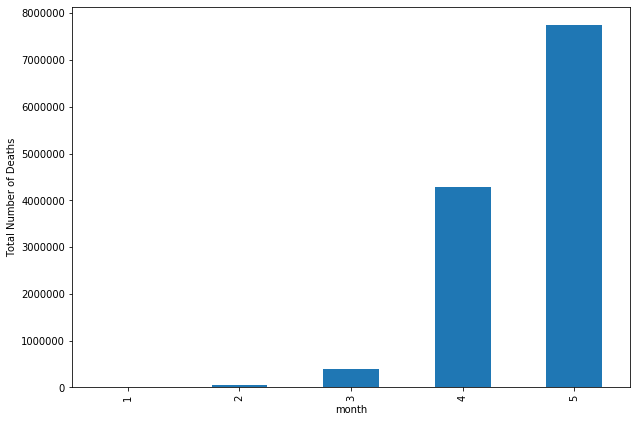

In [319]:
plt.figure(figsize= (10,7))
plt.ylabel('Total Number of Deaths')
month["Deaths"].plot.bar()

In [320]:
df.head()

,Date,Country,Confirmed,Recovered,Deaths,month,day,day_name
0,2020-01-22,Afghanistan,0,0,0,1,22,Wednesday
1,2020-01-22,Albania,0,0,0,1,22,Wednesday
2,2020-01-22,Algeria,0,0,0,1,22,Wednesday
3,2020-01-22,Andorra,0,0,0,1,22,Wednesday
4,2020-01-22,Angola,0,0,0,1,22,Wednesday


In [321]:
day_name = df.groupby(['day_name'],sort=True).sum()
day_name

,Confirmed,Recovered,Deaths,month,day
day_name,,,,,
Friday,26213226,8437822,1742311,10904,54708
Monday,28545053,9373278,1870919,11280,53580
Saturday,27019574,8768630,1791089,11092,52264
Sunday,27802617,9052231,1830007,11280,50196
Thursday,25348006,8068743,1686895,10716,56964
Tuesday,29344165,9706496,1928143,11280,56964
Wednesday,24505737,7750519,1632673,10716,53580


In [322]:
df.head()

,Date,Country,Confirmed,Recovered,Deaths,month,day,day_name
0,2020-01-22,Afghanistan,0,0,0,1,22,Wednesday
1,2020-01-22,Albania,0,0,0,1,22,Wednesday
2,2020-01-22,Algeria,0,0,0,1,22,Wednesday
3,2020-01-22,Andorra,0,0,0,1,22,Wednesday
4,2020-01-22,Angola,0,0,0,1,22,Wednesday


In [325]:
India = df[df["Country"] == "India"]
India

,Date,Country,Confirmed,Recovered,Deaths,month,day,day_name
79,2020-01-22,India,0,0,0,1,22,Wednesday
267,2020-01-23,India,0,0,0,1,23,Thursday
455,2020-01-24,India,0,0,0,1,24,Friday
643,2020-01-25,India,0,0,0,1,25,Saturday
831,2020-01-26,India,0,0,0,1,26,Sunday
...,...,...,...,...,...,...,...,...
22827,2020-05-22,India,124794,51824,3726,5,22,Friday
23015,2020-05-23,India,131423,54385,3868,5,23,Saturday
23203,2020-05-24,India,138536,57692,4024,5,24,Sunday
23391,2020-05-25,India,144950,60706,4172,5,25,Monday


Text(0.5, 1.0, 'Total Infected vs Recovered vs Dead')

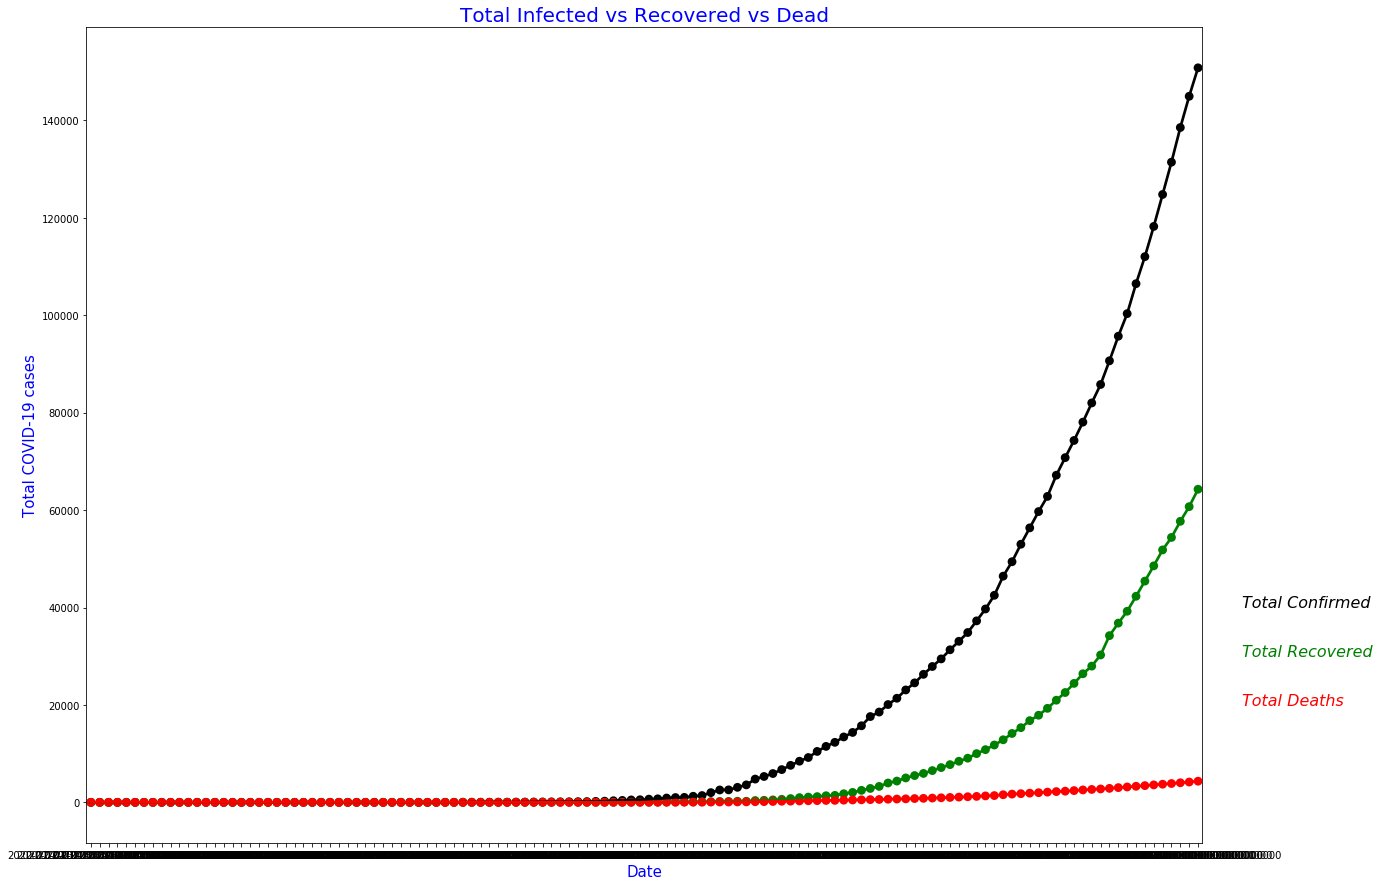

In [326]:
f, ax1 = plt.subplots(figsize=(20,15))
sns.pointplot(x='Date', y='Confirmed', data=India, color='black', alpha=0.8)
sns.pointplot(x='Date', y='Recovered', data=India, color='green', alpha=1)
sns.pointplot(x='Date', y='Deaths', data=India, color='red', alpha=1)
plt.text(130,40000, 'Total Confirmed', color='black', fontsize=16, style='italic')
plt.text(130,30000, 'Total Recovered', color='green',fontsize=16, style='italic')
plt.text(130,20000, 'Total Deaths', color='red',fontsize=16, style='italic')
plt.xlabel('Date', fontsize=15, color='blue')
plt.ylabel('Total COVID-19 cases', fontsize=15, color='blue')
plt.title('Total Infected vs Recovered vs Dead', fontsize=20, color='blue')

In [327]:
India["Daily Cases"] = India["Confirmed"] - India["Confirmed"].shift(+1)
India["Daily Recovered"] = India["Recovered"] - India["Recovered"].shift(+1)
India["Daily Deaths"] = India["Deaths"] - India["Deaths"].shift(+1)
India.head()

,Date,Country,Confirmed,Recovered,Deaths,month,day,day_name,Daily Cases,Daily Recovered,Daily Deaths
79,2020-01-22,India,0,0,0,1,22,Wednesday,NaN,NaN,NaN
267,2020-01-23,India,0,0,0,1,23,Thursday,0.0,0.0,0.0
455,2020-01-24,India,0,0,0,1,24,Friday,0.0,0.0,0.0
643,2020-01-25,India,0,0,0,1,25,Saturday,0.0,0.0,0.0
831,2020-01-26,India,0,0,0,1,26,Sunday,0.0,0.0,0.0


Text(0.5, 1.0, 'Daily Infected vs Recovered vs Dead')

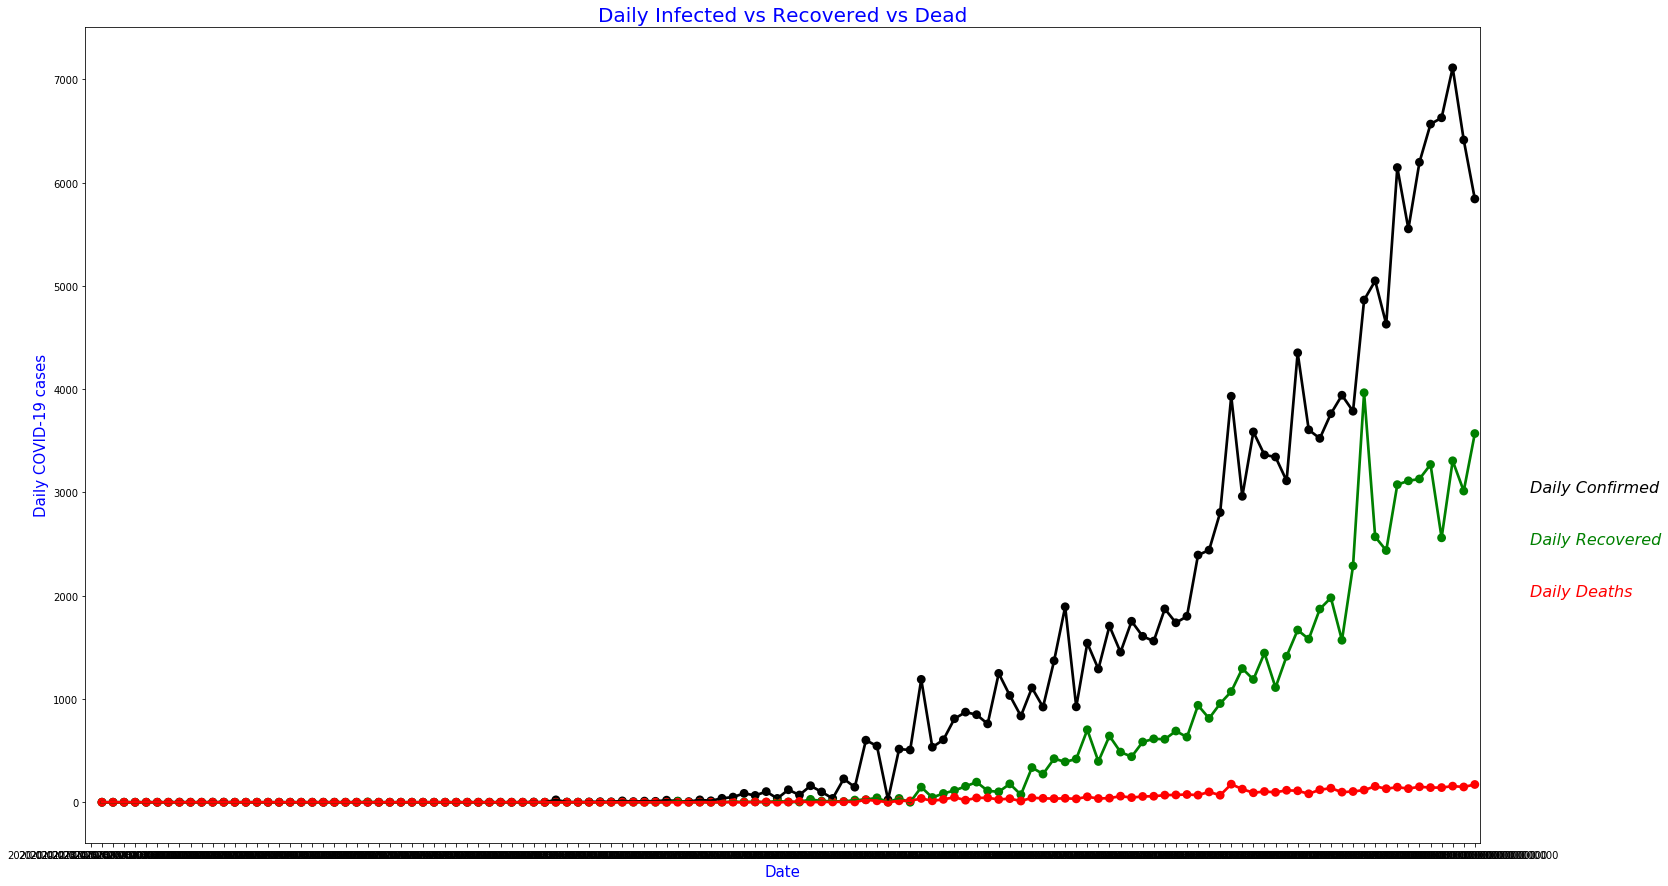

In [328]:
f, ax1 = plt.subplots(figsize=(25,15))
sns.pointplot(x='Date', y='Daily Cases', data=India, color='black', alpha=0.8)
sns.pointplot(x='Date', y='Daily Recovered', data=India, color='green', alpha=1)
sns.pointplot(x='Date', y='Daily Deaths', data=India, color='red', alpha=1)
plt.text(130,3000, 'Daily Confirmed', color='black', fontsize=16, style='italic')
plt.text(130,2500, 'Daily Recovered', color='green',fontsize=16, style='italic')
plt.text(130,2000, 'Daily Deaths', color='red',fontsize=16, style='italic')
plt.xlabel('Date', fontsize=15, color='blue')
plt.ylabel('Daily COVID-19 cases', fontsize=15, color='blue')
plt.title('Daily Infected vs Recovered vs Dead', fontsize=20, color='blue')

In [339]:
y = India["Confirmed"]
X = India["Date"]

In [340]:
X = np.array(range(len(X))).reshape((-1,1))

In [347]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
max_r2_score=0
for r_state in range(0,100):
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25,random_state=r_state)
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    y_pred = lr.predict(X_test)
    r2_scr = r2_score(y_test,y_pred)
    if r2_scr>max_r2_score:
        max_r2_score = r2_scr
        final_r_state = r_state
    
print("max R2 score corresponding to random state",final_r_state,"is",max_r2_score)

max R2 score corresponding to random state 65 is 0.6977853219309184


In [359]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25,random_state=54)

In [360]:
print(X_train.shape,"\n",X_test.shape)

(94, 1) 
 (32, 1)


In [361]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

In [362]:
LR = LinearRegression()
RR = Ridge(alpha=0.1)
LSR = Lasso()
KNR = KNeighborsRegressor(n_neighbors=2)#(n_neighbors=2)
SV = SVR(kernel='rbf',C=100)
DTC = DecisionTreeRegressor(random_state=99)
RFC = RandomForestRegressor(n_estimators = 500,random_state = 99)
ABC = AdaBoostRegressor()#(n_estimators=100,base_estimator=SV,algorithm='SAMME')
GBC = GradientBoostingRegressor(learning_rate = 0.1, n_estimators = 240,random_state=99)
XGB = xgb.XGBRegressor(random_state=99)

In [363]:
models = []
models.append(("LinearRegression", LR))
models.append(("Ridge", RR))
models.append(("Lasso", LSR))
models.append(("KNeighborsRegressor", KNR))
models.append(("SVR", SV))
models.append(("DecisionTreeRegressor", DTC))
models.append(("RandomForestRegressor", RFC))
models.append(("AdaBoostRegressor", ABC))
models.append(("GradientBoostingRegressor", GBC))
models.append(("XGBoostRegressor", XGB))

In [364]:
from sklearn.model_selection import cross_val_score

In [365]:
Model = []
score = []
cvs = []
for name,model in models:
    print("*****************",name,"******************\n")
    Model.append(name)
    model.fit(X_train,y_train)
    print(model)
    pre = model.predict(X_test)
    print("\n")
    R2 = r2_score(y_test,pre)
    print("R2 Score = ",R2)
    score.append(R2)
    print("\n")
    sc = cross_val_score(model,X,y,cv=10,scoring="r2").mean()
    print("Cross val score = ",sc)
    cvs.append(sc*100)
    print("\n")
    print("Mean Squared error\n", mean_squared_error(y_test,pre))
    print("\n")
    mae = mean_absolute_error(y_test,pre)
    print("Mean absolute error \n{}".format(mae))
    print("\n\n")

***************** LinearRegression ******************

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


R2 Score =  0.5740087365876105


Cross val score =  -147352164.49444512


Mean Squared error
 483340575.47824043


Mean absolute error 
19441.46884964897



***************** Ridge ******************

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)


R2 Score =  0.5740088455938548


Cross val score =  -147351756.36603126


Mean Squared error
 483340451.7969695


Mean absolute error 
19441.463377141292



***************** Lasso ******************

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


R2 Score =  0.57400886534555


Cross val score =  -147351671.61864012


Mean Squared error
 483340429.38619125


Mean absolute 

In [366]:
result = pd.DataFrame({"Model": Model, "R2 Socre": score, "Cross val score": cvs})
result

,Model,R2 Socre,Cross val score
0,LinearRegression,0.574009,-1.473522e+10
1,Ridge,0.574009,-1.473518e+10
2,Lasso,0.574009,-1.473517e+10
3,KNeighborsRegressor,0.996068,-1.423238e+02
4,SVR,-0.324330,-2.709113e+07
5,DecisionTreeRegressor,0.995100,-1.086539e+02
6,RandomForestRegressor,0.998615,-1.336764e+02
7,AdaBoostRegressor,0.987837,-6.048662e+07
8,GradientBoostingRegressor,0.995100,-1.349484e+02
9,XGBoostRegressor,0.994763,-1.875349e+02


In [358]:
df.head()

,Date,Country,Confirmed,Recovered,Deaths,month,day,day_name
0,2020-01-22,Afghanistan,0,0,0,1,22,Wednesday
1,2020-01-22,Albania,0,0,0,1,22,Wednesday
2,2020-01-22,Algeria,0,0,0,1,22,Wednesday
3,2020-01-22,Andorra,0,0,0,1,22,Wednesday
4,2020-01-22,Angola,0,0,0,1,22,Wednesday


In [291]:
India = India.set_index('Date')
India.head()

KeyError: "None of ['Date'] are in the columns"

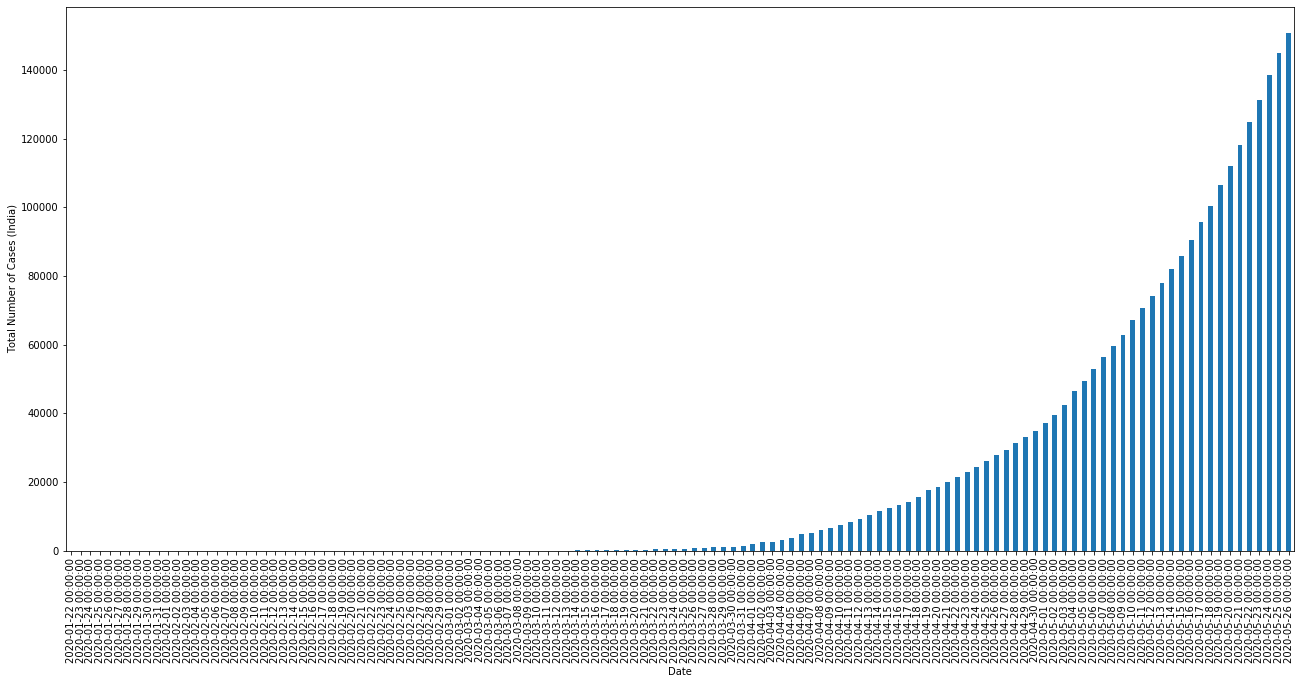

In [234]:
plt.figure(figsize= (22,10))
plt.ylabel('Total Number of Cases (India)')
India["Confirmed"].plot.bar()

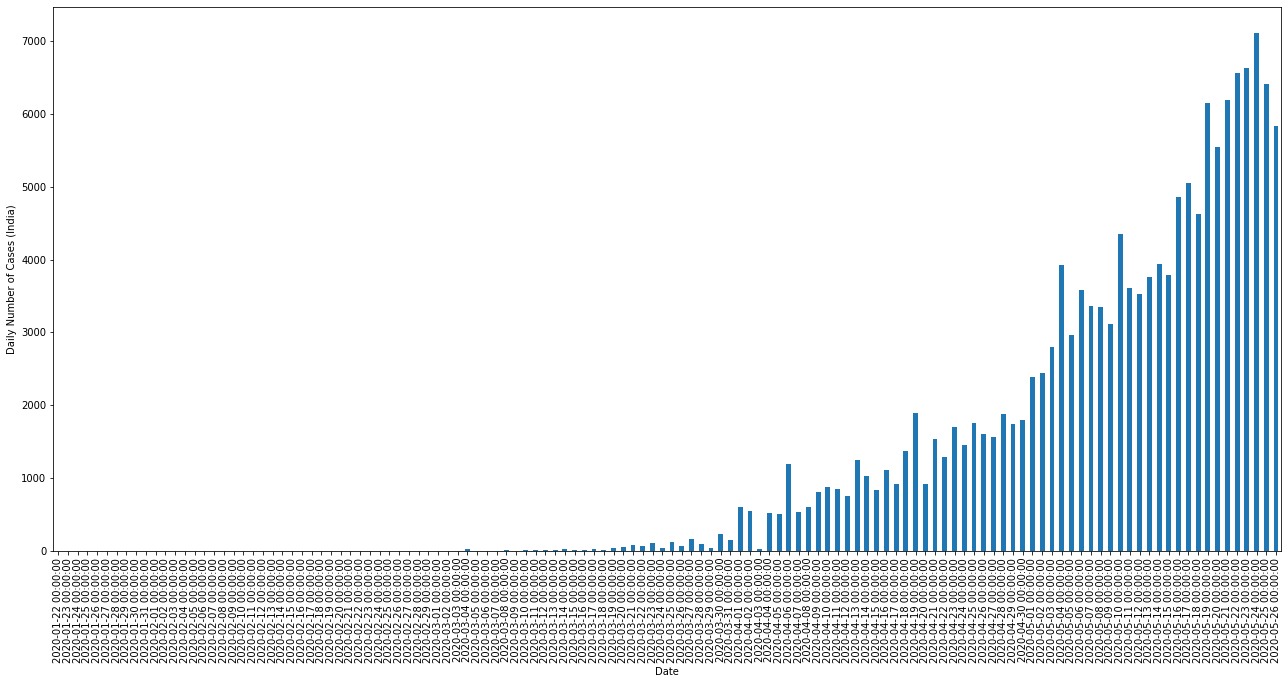

In [235]:
plt.figure(figsize= (22,10))
plt.ylabel('Daily Number of Cases (India)')
India["Daily Cases"].plot.bar()

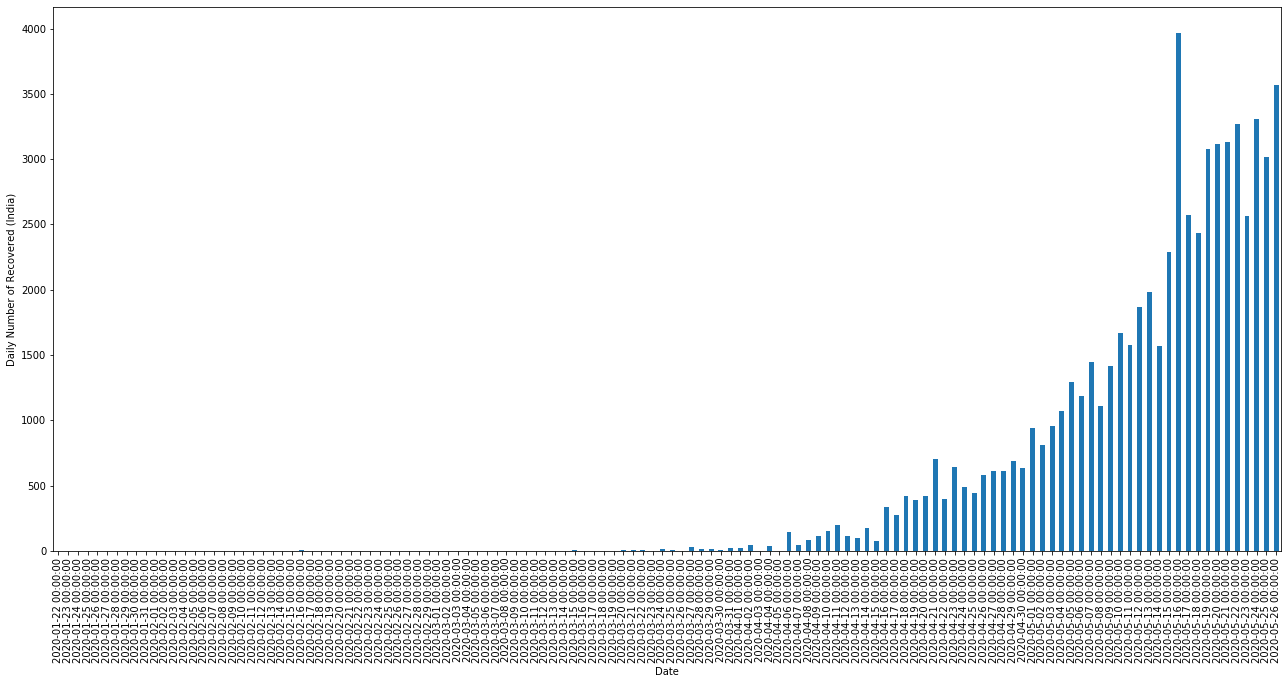

In [236]:
plt.figure(figsize= (22,10))
plt.ylabel('Daily Number of Recovered (India)')
India["Daily Recovered"].plot.bar()

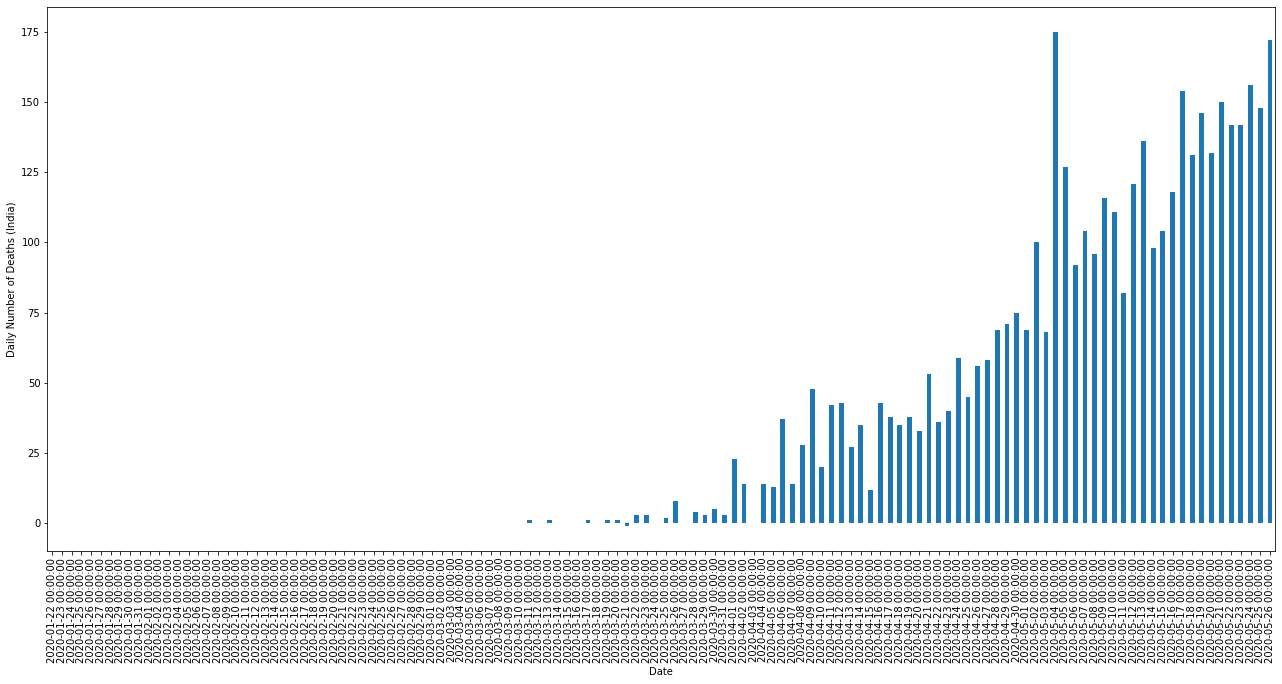

In [237]:
plt.figure(figsize= (22,10))
plt.ylabel('Daily Number of Deaths (India)')
India["Daily Deaths"].plot.bar()

In [239]:
df.head()

,Date,Country,Confirmed,Recovered,Deaths,month,day,day_name
0,2020-01-22,Afghanistan,0,0,0,1,22,Wednesday
1,2020-01-22,Albania,0,0,0,1,22,Wednesday
2,2020-01-22,Algeria,0,0,0,1,22,Wednesday
3,2020-01-22,Andorra,0,0,0,1,22,Wednesday
4,2020-01-22,Angola,0,0,0,1,22,Wednesday
